<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
#You code here
for col in customers.columns:
    print(f'{col} - mean:', customers[f'{col}'].mean())

Channel - mean: 1.3227272727272728
Region - mean: 2.543181818181818
Fresh - mean: 12000.297727272728
Milk - mean: 5796.265909090909
Grocery - mean: 7951.277272727273
Frozen - mean: 3071.931818181818
Detergents_Paper - mean: 2881.4931818181817
Delicassen - mean: 1524.8704545454545


In [5]:
#You code here
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


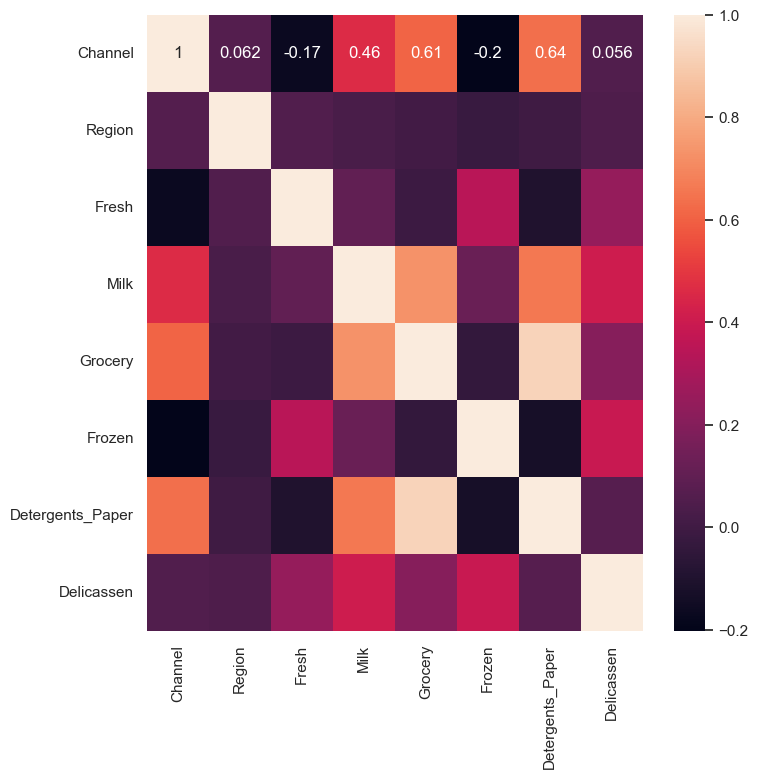

In [6]:
#You code here
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(8,8)});

plt.figure()
sns.heatmap(customers.corr(), annot=True);

In [7]:
#You code here
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


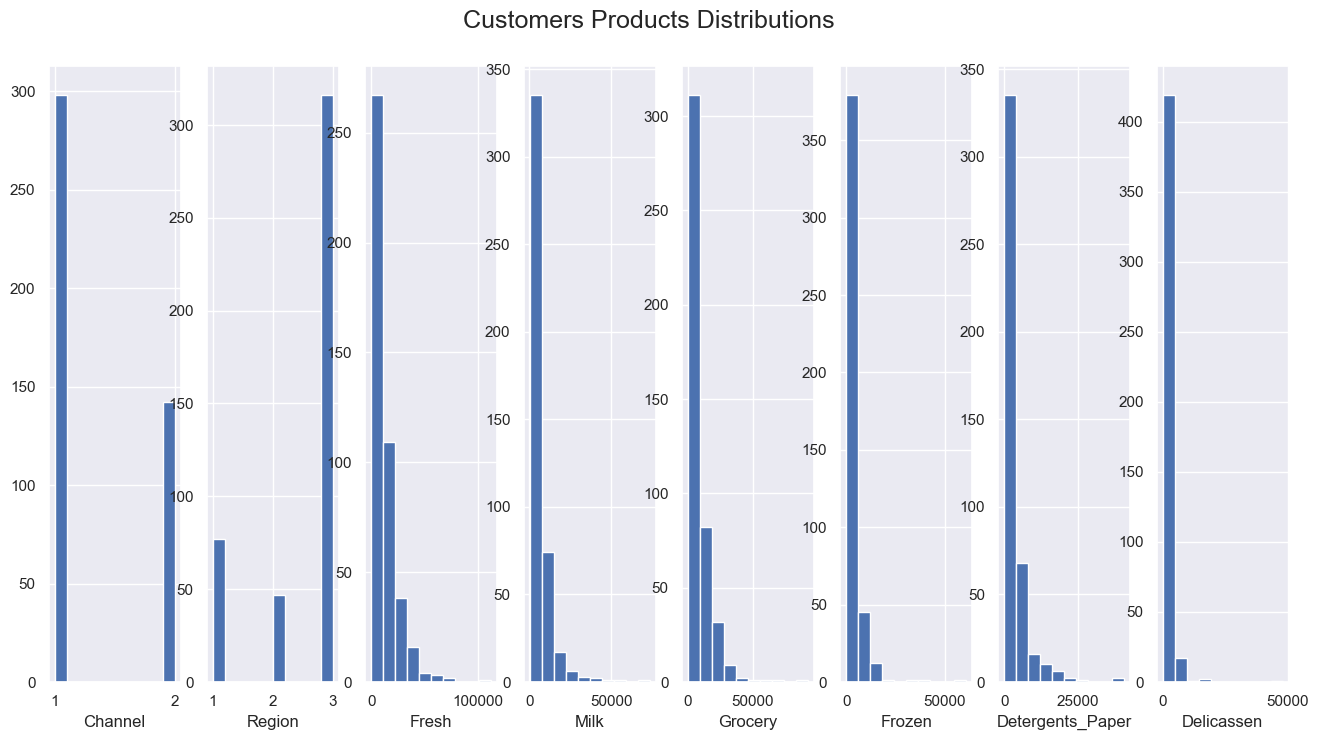

In [8]:
fig,ax = plt.subplots(1,8, figsize=(16,8))
plt.suptitle("Customers Products Distributions", fontsize=18, y=0.95)

for i,c in enumerate(customers.columns):
    plt.sca(ax[i])
    plt.hist(customers[f'{c}'])
    plt.xlabel(customers[f'{c}'].name)

**Your observations here**

+ Frozen, Grocery, Milk and Detergents Paper have a high std desviation.
+ Find a high correlation between Milk, Grocery and Detergents Papers
+ 
+ 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

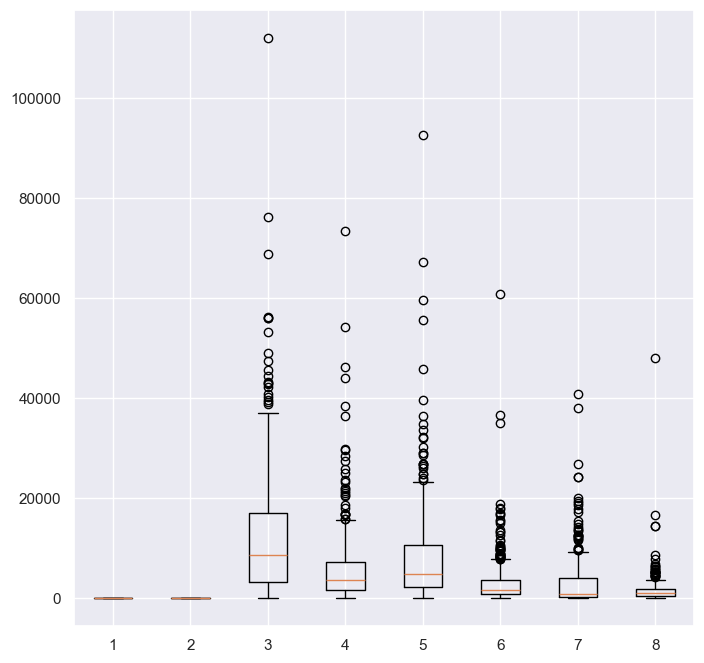

In [9]:
# Your code here
plt.boxplot(customers);

In [10]:
stats = customers.describe().T
stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0,1.00
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0,1.00
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.00
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,8502.75
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00


In [11]:
def get_outliers(df: pd.DataFrame, stats: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    """
    Esta funcion recibe un dataframe df.describe().T.
    
    Devuelve un dataframe.
    
    :param: stats, pd.DataFrame
    :param: threshold, umbral del test de tukey
    
    :return: pd.DataFrame
    """
    
    outliers=pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr=stats.at[c, 'IQR']

        cutoff=threshold * iqr  # test tukey

        lower=stats.at[c, '25%'] - cutoff
        upper=stats.at[c, '75%'] + cutoff

        res=df[(df[c] < lower) | (df[c] > upper)].copy()

        res['outliers']=c

        outliers=outliers.append(res, sort=True)

    
    return outliers

In [12]:
outliers = get_outliers(customers, stats)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
clean_index=[i for i in customers.index if i not in outliers.index]

In [ ]:
clean_customers = customers.iloc[clean_index]
clean_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 23.3 KB


**Your comment here**

+ It seems that our data follows the Pareto principle because the 25% aprox of data are a outlier.
+ 
+ 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()


In [ ]:
customers_scale = pd.DataFrame(scaler.fit_transform(clean_customers), columns=clean_customers.columns)

In [ ]:
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.579474,0.590092,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,1.579474,0.590092,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,-0.633122,0.590092,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,1.579474,0.590092,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,1.579474,0.590092,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949
...,...,...,...,...,...,...,...,...
327,-0.633122,0.590092,1.419665,-0.876407,-0.222926,-0.934752,-0.269195,-0.755184
328,-0.633122,0.590092,-0.928323,-0.264181,-0.871064,-0.188850,-0.683883,0.525319
329,-0.633122,0.590092,0.881474,-0.054547,0.421038,-0.689050,0.175783,-0.216984
330,-0.633122,0.590092,0.091122,-0.632529,-0.724184,-0.483809,-0.764090,1.346590


In [ ]:
customers_scale.Region.value_counts()

 0.590092    239
-1.970829     60
-0.690369     33
Name: Region, dtype: int64

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
from sklearn.cluster import KMeans

# Your code here:
kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(customers_scale) for k in range(1, 10)]


#silhouette_scores = [silhouette_score(data_scaled, model.labels_)
#                     for model in kmeans_per_k]

inertias = [model.inertia_ for model in kmeans_per_k]

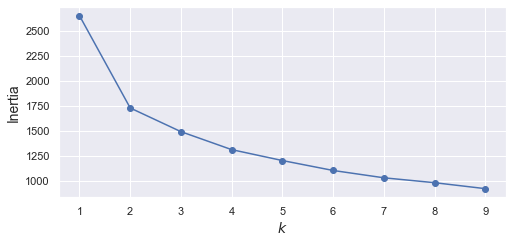

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [ ]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [ ]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [ ]:
# Your code here:
clean_customers.Label.value_counts()

1    233
0     99
Name: Label, dtype: int64

In [ ]:
centroid = kmeans_2.cluster_centers_
centroid

array([[ 1.40067797,  0.17620553, -0.22313038,  1.05752762,  1.1926931 ,
        -0.35576072,  1.30403492,  0.39261285],
       [-0.59513785, -0.07486844,  0.09480647, -0.44933577, -0.5067666 ,
         0.15116013, -0.55407492, -0.16681833]])

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here
from sklearn.cluster import DBSCAN 

dbscan= DBSCAN(eps=0.5)

dbscan.fit(customers_scale)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here

dbscan_labels = dbscan.labels_


In [ ]:
clean_customers['DBscan_Label'] = dbscan_labels

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

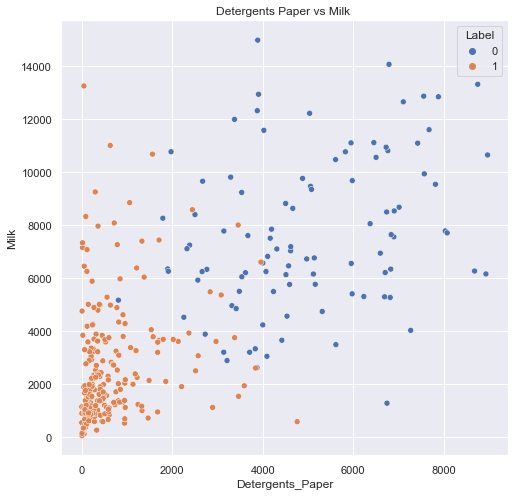

In [ ]:
# Your code here:
plot(clean_customers.Detergents_Paper, clean_customers.Milk, clean_customers.Label)

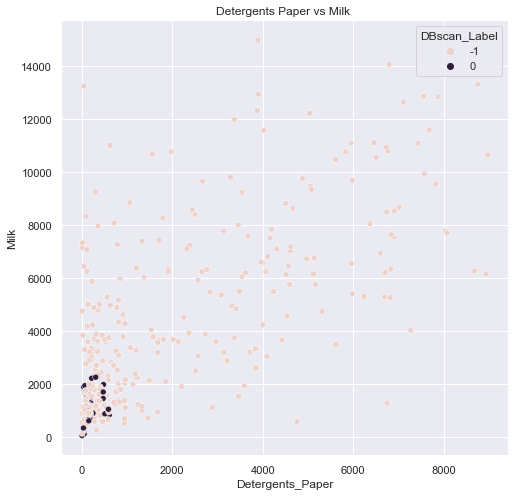

In [ ]:
plot(clean_customers.Detergents_Paper, clean_customers.Milk, clean_customers.DBscan_Label)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

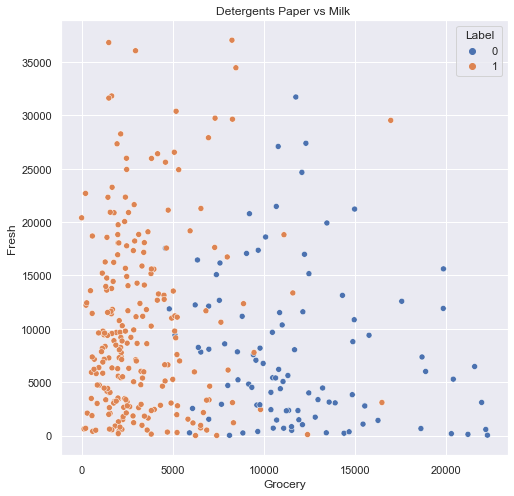

In [ ]:
# Your code here:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.Label)

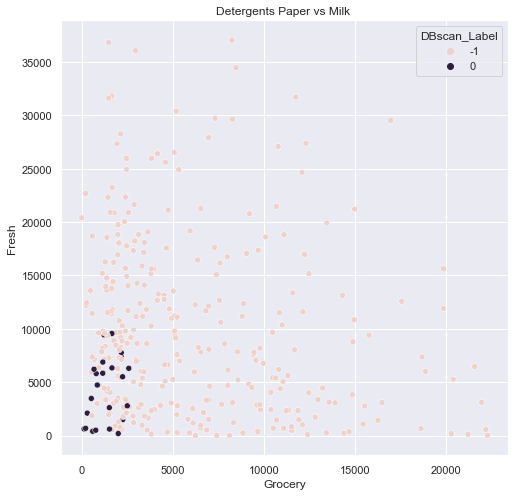

In [ ]:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.DBscan_Label)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

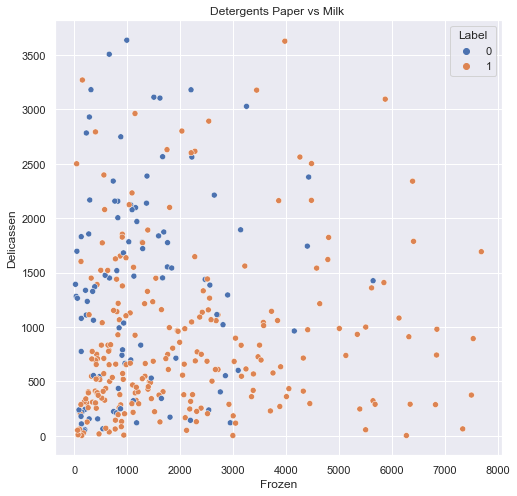

In [ ]:
# Your code here:
plot(clean_customers.Frozen, clean_customers.Delicassen, clean_customers.Label)

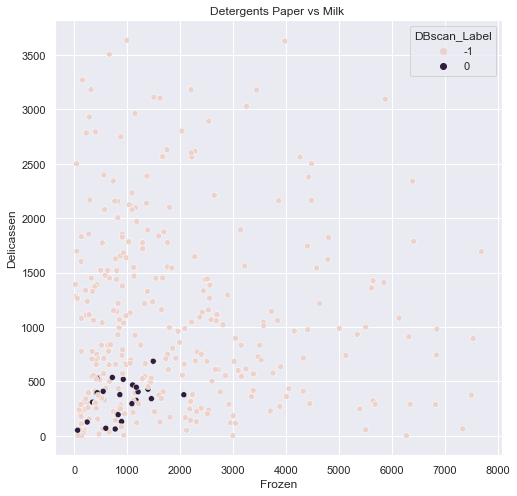

In [ ]:
plot(clean_customers.Frozen, clean_customers.Delicassen, clean_customers.DBscan_Label)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:
clean_customers.groupby('Label').agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DBscan_Label
Label,,,,,,,,,
0,1.919192,2.676768,7728.989899,7656.606061,11876.454545,1256.363636,5015.545455,1339.767677,-1.000000
1,1.017167,2.480687,10320.025751,2596.206009,3325.901288,2120.824034,660.261803,879.291845,-0.896996


In [ ]:
clean_customers.groupby('DBscan_Label').agg('mean')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
DBscan_Label,,,,,,,,,
-1,1.308442,2.503247,9952.808442,4337.454545,6223.438312,1942.230519,2093.649351,1070.172078,0.678571
0,1.000000,3.000000,4344.625000,1124.333333,1411.875000,846.875000,230.666667,329.125000,1.000000


Which algorithm appears to perform better?

**Your observations here**

     The performance of two algorithms would be better but, without many tests we can see that KMeans it's working better, showing the means at firts view KMeans algorithm is clustering clients by Channel, only have 2 Channels and the mean results in th KMeans (1,919, 1,017) are similar to the value of the Channel values (2,1).

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here
kmeans_3 = KMeans(n_clusters=3).fit(customers_scale)

labels_km3 = kmeans_3.predict(customers_scale)

clusters_km3 = kmeans_3.labels_.tolist()

In [ ]:
clean_customers['Label_km3'] = clusters_km3

In [ ]:
kmeans_4 = KMeans(n_clusters=4).fit(customers_scale)

labels_km4 = kmeans_4.predict(customers_scale)

clusters_km4 = kmeans_4.labels_.tolist()

In [ ]:
clean_customers['Label_km4'] = clusters_km4

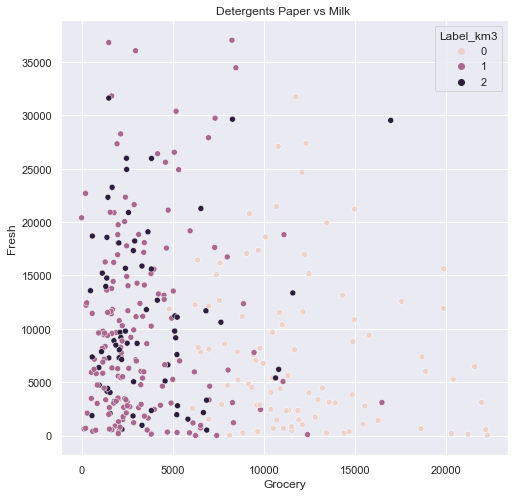

In [ ]:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.Label_km3)

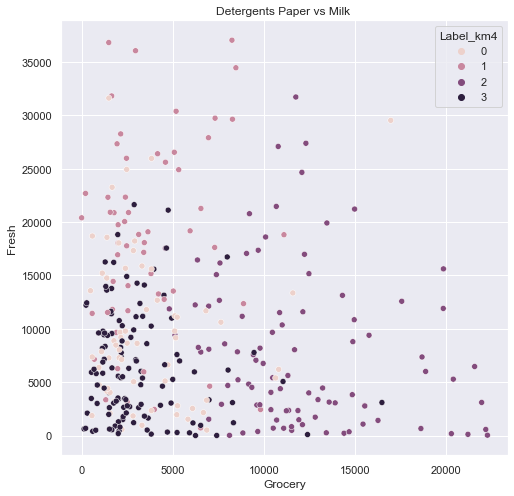

In [ ]:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.Label_km4)

**Your comment here**

    Looking the plots for KMeans with 3 and 4 clusters we can see that the KMeans for 2 clusters it's working better.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here
from sklearn.cluster import DBSCAN 

dbscan= DBSCAN(eps=1, min_samples=7)

dbscan.fit(customers_scale)

dbscan_labels_test_1 = dbscan.labels_

dbscan_labels_test_1

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,
       -1,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1,
       -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,
       -1, -1,  0, -1, -1, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1

In [ ]:
clean_customers['DBscan_Label_test_1'] = dbscan_labels_test_1

In [ ]:
dbscan= DBSCAN(eps=2, min_samples=2)

dbscan.fit(customers_scale)

dbscan_labels_test_2 = dbscan.labels_

dbscan_labels_test_2

array([ 0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,
        1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,
        1,  1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
       -1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,
        0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1, -1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0

In [ ]:
clean_customers['DBscan_Label_test_2'] = dbscan_labels_test_2

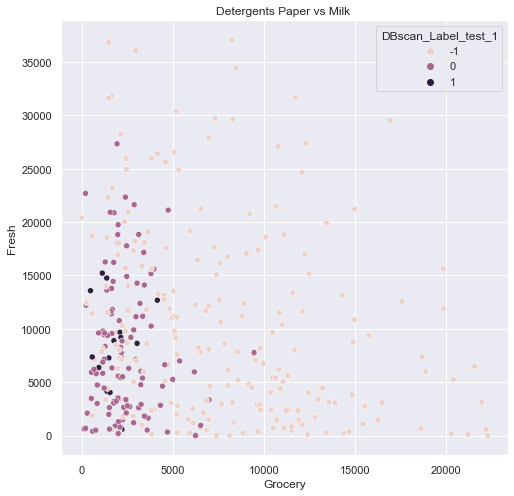

In [ ]:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.DBscan_Label_test_1)

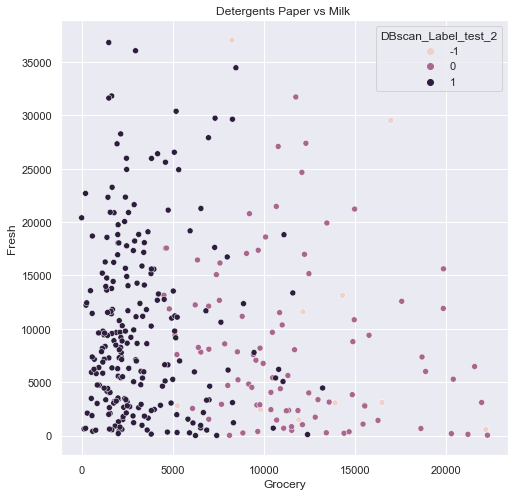

In [ ]:
plot(clean_customers.Grocery, clean_customers.Fresh, clean_customers.DBscan_Label_test_2)

**Your comment here**

    + Fit DBscan Model have more work than KMeans but we can obtain similar results after some test.
    + Depends on time you have you can choose any model but if you don't have much time i think KMeans algorithm is faster than DBscan
    
